In [1]:
from typing import Tuple
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader, Dataset
from dmss.dataset import PolypDataset
from torchvision.transforms import v2
import numpy as np
import cv2 as cv


mean=np.array([0.485, 0.456, 0.406])
std=np.array([0.229, 0.224, 0.225])

transforms = v2.Compose(
        [
            v2.Resize(size=(640, 640)),
            v2.ToDtype(torch.float32, scale=True),
        ]
    )


In [2]:
train_dataset = PolypDataset("/Users/akrylov/PycharmProjects/DMSS/data/external/data.csv", transform=transforms)


In [3]:
def draw_mask(image, mask_generated) :
  masked_image = image.copy()
  image = (image * 255).astype(np.uint8)

  masked_image = np.where(mask_generated.astype(int),
                          np.array([0,255,0], dtype='uint8'),
                          masked_image)

  masked_image = masked_image.astype(np.uint8)

  return cv.addWeighted(image, 0.8, masked_image, 0.4, 0)

In [4]:
ind = 1
image = np.clip(train_dataset[ind][0].to('cpu').numpy().transpose(1,2,0)*std + mean, 0, 1)
mask = np.clip(train_dataset[ind][1].to('cpu').numpy().transpose(1,2,0)*0.5 + 0.5, 0, 1)

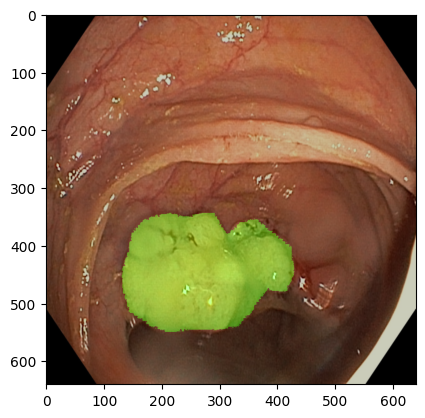

In [5]:
segmented_image = draw_mask(image, mask)
plt.imshow(cv.cvtColor(segmented_image, cv.COLOR_BGR2RGB))